In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In the second question, I created a graph representing all the series. Upon reviewing this visualization, it appears there may be a relationship between the series encompassing all items and the series specifically tracking gasoline. Let's explore this relationship further.

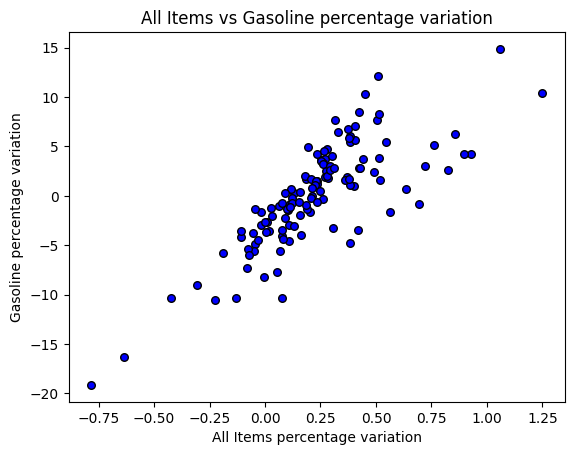

Correlation between All Items and Gasoline: 0.7981777261452881


In [62]:
df = pd.read_csv('CPIdata.csv')
df['All Items'] = df['All Items'].pct_change() * 100
df['All Items Less Food and Energy'] = df['All Items Less Food and Energy'].pct_change() * 100
df['Gasoline'] = df['Gasoline'].pct_change() * 100
df = df.dropna()
all_items = df['All Items']
gasoline = df['Gasoline']

plt.scatter(all_items, gasoline, color='b', marker='o', label='All Items vs Gasoline', s=30, edgecolors='black')
plt.title('All Items vs Gasoline percentage variation')
plt.xlabel('All Items percentage variation')
plt.ylabel('Gasoline percentage variation')
plt.show()

print('Correlation between All Items and Gasoline:', all_items.corr(gasoline))

Upon examining the graph, it is evident that there is a discernible relationship between the series encompassing all items and the series specifically tracking gasoline. As the values in the gasoline series rise, those in the all items series tend to increase as well. Moreover, with a correlation coefficient of 0.789, the two series exhibit a strong correlation. To further understand the dynamics of this relationship, conducting a linear regression analysis would be beneficial.

In [80]:
gasoline = sm.add_constant(gasoline)
mod = sm.OLS(all_items, gasoline)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              All Items   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           7.58e-29
Time:                        02:36:30   Log-Likelihood:                 41.569
No. Observations:                 125   AIC:                            -79.14
Df Residuals:                     123   BIC:                            -73.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2246      0.016     14.354      0.0

The coefficient of determination,R-squared, is 0.637, indicating that 63.7% of the variation in the "all items" series can be accounted for by variations in the "gasoline" series. Moreover, a 1% increase in the "gasoline" series is associated with a corresponding 0.0452% increase in the "all items" series. This suggests that changes in the "gasoline" series serve as a reliable predictor of shifts in the "all items" series, highlighting a significant relationship between these variables.